<a href="https://colab.research.google.com/github/Hedriss10/candidatos_rh_analise/blob/main/candidatos_rh_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Análise de dados  **Recursos Humanos**

*Projeto de análise de dados de candidatos a vagas de emprego, seguinte segmento é buscar informação para determina insights e buscar informações preditivas sobre os dados que temos. A seguir abaixo os códigos que seguem sobre análise é necessário um conhecimento básico sobre programação, linguagem de programação [Python](https://https://www.python.org/).*

*Este projeto explico passo a passo, sobre tópicos importante em uma análise de dados.*

*Os dados estarão disponíveis no meu [Github](https://https://github.com/Hedriss10), desde então o Treino e Teste*.
<hr>

## **dicionário** do dataset 

**Features**

enrollee_id : 

Unique ID for candidate:

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change


**A celular a baixo identificar as ferramentas que usei neste projeto, para poder me auxiliar na análise de dados.**

**Sobre as Lib são de extrema importância para me auxiliar sobre o projeto de análise de dados!**

In [ ]:
#Importando as ferramentas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go 
import missingno
import category_encoders as ce 
import scipy 

from plotly.subplots import make_subplots
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# ignore warnings 
import sys 
import warnings 
if not sys.warnoptions:
  warnings.simplefilter("ignore")

In [ ]:
!pip install -q -U watermark
!pip install -q missingno 
!pip install -q category_encoders
!pip install -q plotly
!pip install seaborn

## Carregamentos dos dados 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Hedriss10/project-analise-rh/master/data/aug_train.csv')
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**É de extrema importância sobre as informação que temos sobre o banco de dados.**

In [ ]:
#Informação sebre o banco de dados 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**Buscando dados não númericos do dataset**

In [ ]:
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


**Descrevendo dados estatísticos numéricos sobre o dataset.**

*Em **City_developement_index**, o (CDI) os valores médios são 0.828, mediana é 0.903,o desvio padrão é 0.123. 
Isso siginifica que a maioria dos canditados é de cidades bem desenvolvidas.*

*Em **Training_hours**, os valores médios são 65.366, mediana é 47.00, o desvio padrão é 60.36. Isso signiifca que há mais candidatos com poucas horas de treinamento mas alguns candidatos gastam muito tempo para fazer o treinamento.*

In [ ]:
df.describe().drop(columns=['enrollee_id', 'target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


**Mostrando variáveis categóricas**

*Gráficos de barras por todo o dataset e plotagem das variáveis não categóricas.*

In [ ]:
list(df.columns.values)[3:12]

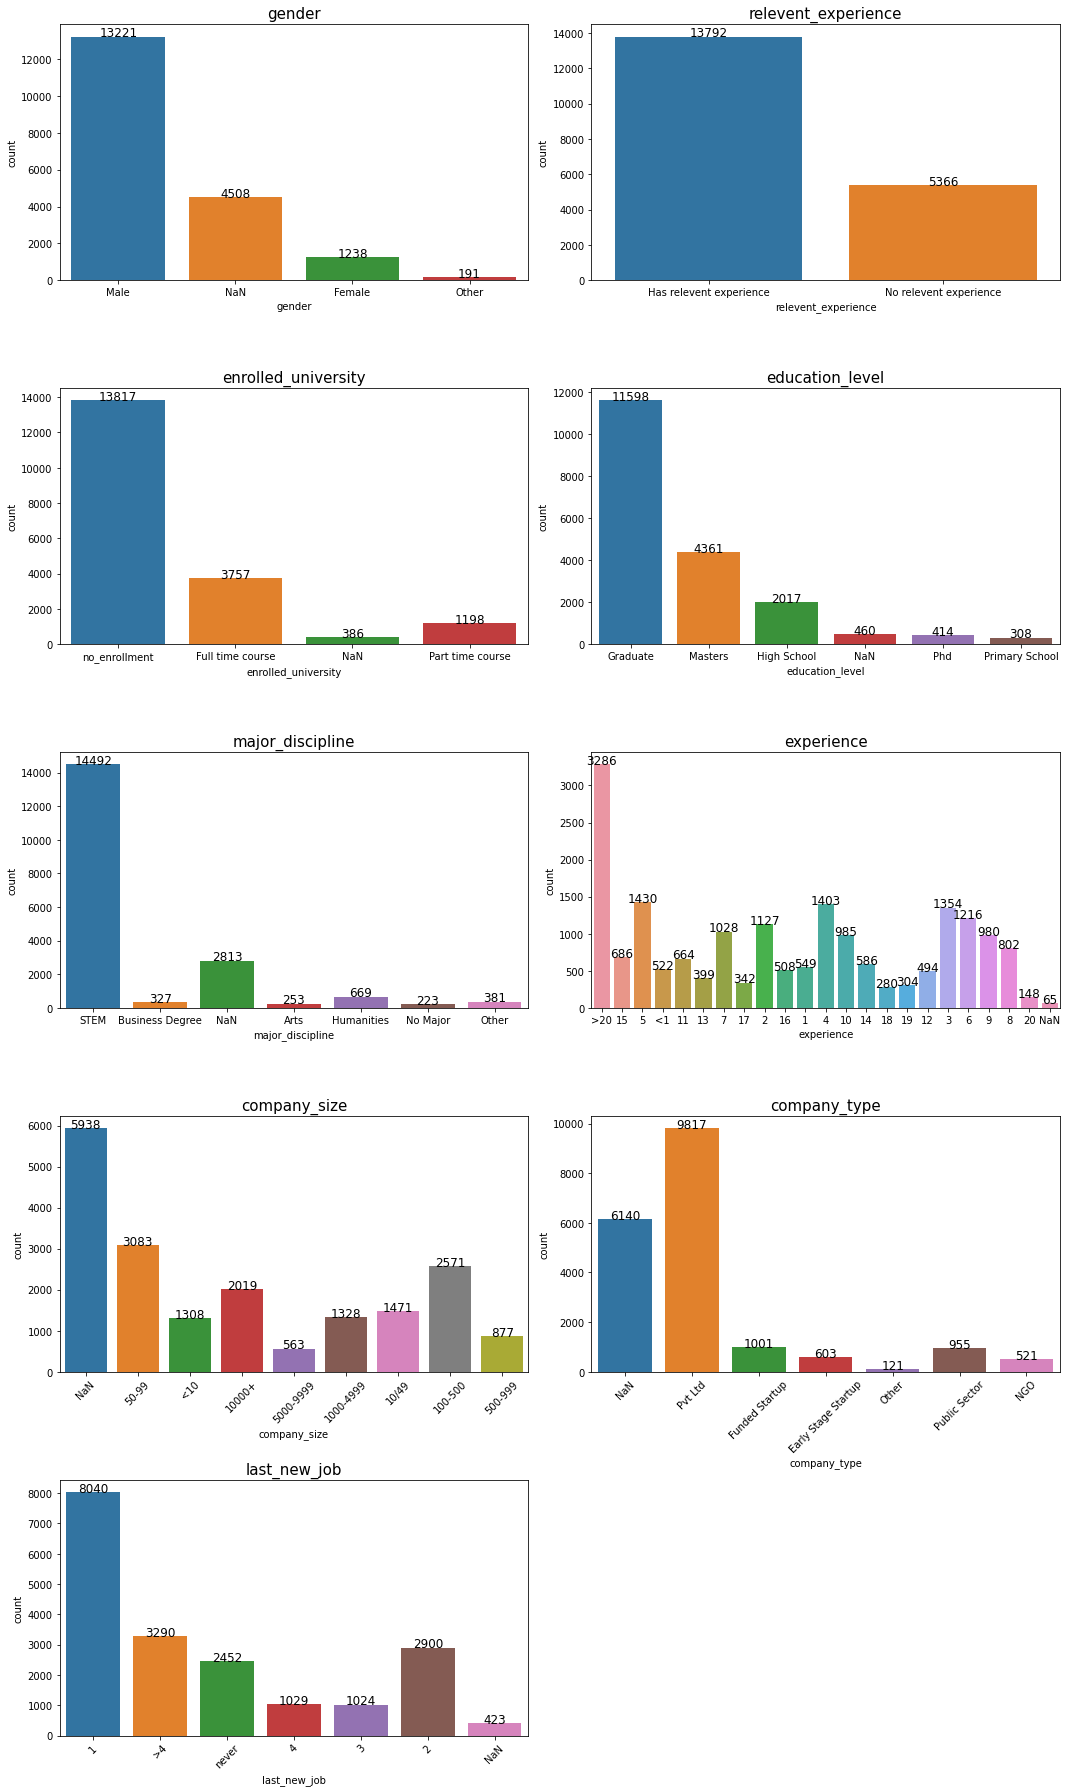

In [ ]:
#Plot das variáveis categoricas 
plt.figure(figsize=(15,25))

#Lista do dataframe
comun_list = list(df.columns.values)[3:12]

#Contador
X = 0

#Loop
for f in comun_list:
  X += 1
  plt.subplot(5, 2 ,X)
  ax = sns.countplot(data= df.fillna("NaN"), x= f)
  plt.title(f, fontsize=15)
  for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=12)
    if X >= 7:
      plt.xticks(rotation=45)

#layout
plt.tight_layout()

**Verificando a distribuição das variáveis númericas**

*Em **Estatística**, a distribuição normal é uma das distribuição de propabilidade mais utilizada para modelar fenômenos naturais. Isso deve o fator de que um grande número de fenômenos naturais apresenta em uma distribuição de propabilidade tão aproximadamente nromal, que a ela pode ser com os seguintes fatores:*

* A distribuição normal, também conhecida como distribuição **gaussiana**, uma curva simétrica em torno do seu ponto médio, apresentando assim seu famoso formato de sino.

* A distribuição estatística é uma função que define a curva, e a área sob essa curva determninada a propabilidade de ocorrer o evento por ela correlacionado.

**E oque é a distribuição normal?**

*A curva de **distruibuição normal** representa o comportamento de diversos processos, nas empresas e muitos fenômenos comuns, como por exemplo altura, peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar um prova*

*A **distribuição normal** pode ser usada para aproximar distribuições discretas de propabilidade, como por exemplo a distribuição normal. Além, disso a distribuição normal serve também como base para inferência estatística clássica*

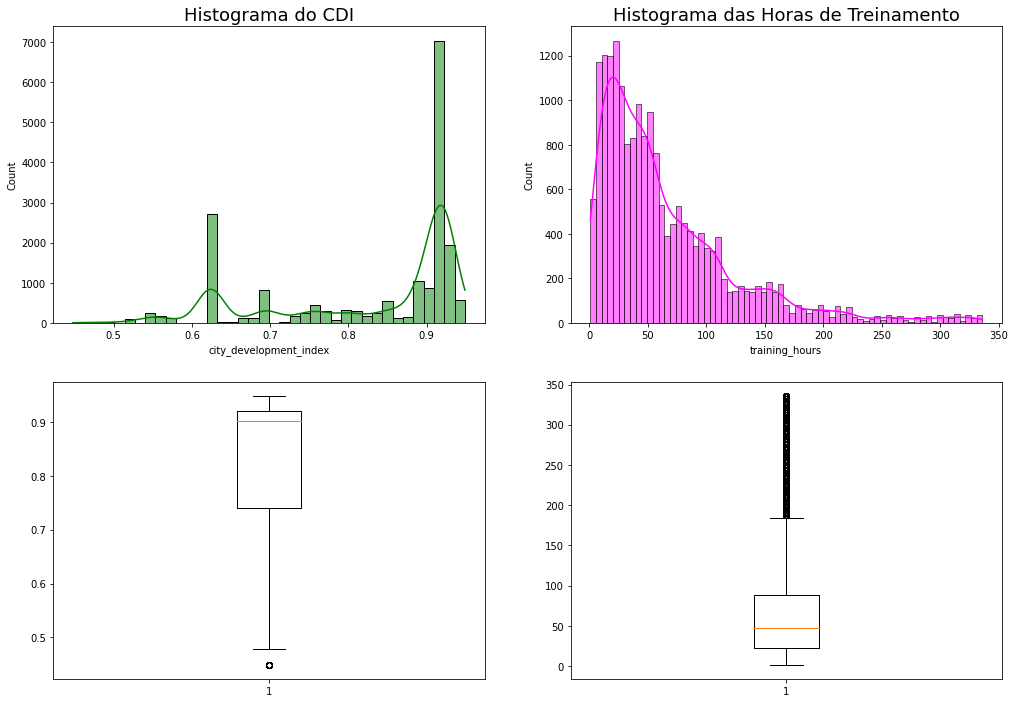

In [ ]:
plt.figure(figsize=(17, 12))

#Plotando o histograma 
plt.subplot(221)
sns.color_palette("hls", 8)
sns.histplot(df['city_development_index'], kde=True, color="green")
plt.title("Histograma do CDI", fontsize=18)

plt.subplot(222)
sns.histplot(df['training_hours'], kde=True, color='magenta')
plt.title("Histograma das Horas de Treinamento", fontsize=18)

#Subplots com boxplot 
plt.subplot(223)
plt.boxplot(df['city_development_index'])


plt.subplot(224)
plt.boxplot(df['training_hours'])
plt.show()

**Teste de Normalidade da Distribuição**

* As variáveis **city_development_index** e **training_hours** não seguem a distribuição normal. Para análise numérica, usaremos o métedos não paramétrico


* Dados de training_hours estão localizados principalmente no lado esquertdo do Histogram, é um comportamento esperado porque as pessoas geralmente ficam animada ao fazer o treinamento no início, mas nem todos que começam conseguem terminar uma maratona.

In [ ]:
# Dist de normalidade  

# Listando as variáveis númericas
numerical_feature = ['city_development_index', 'training_hours']

# Loop 
for f in numerical_feature:
  # calculando a normalidade 
  stats, pval = normaltest(df[f])
  if pval > 0.5:
    print(f, ': Distribuição Normal')
  else:
    print(f, ': Distruibuição Não Normal')

city_development_index : Distruibuição Não Normal
training_hours : Distruibuição Não Normal


**Correlação de dados**

* Pela correlação de spearm, last_new_job é experience tem correlação média (0,47), enquanto outros têm correlação fraca

* As variáveis last_new_job e training_hours tem correlação próxima de zero com a variável alvo e poderiam ser **descartadas**


In [ ]:
#Convertendo a coluna experience, last_new_job para coluna numérica
df['experience'] = np.where(df['experience'] == "<1", 1 , df['experience'])
df['experience'] = np.where(df['experience'] == ">20", 21, df['experience'])
df['last_new_job'] = np.where(df['last_new_job'] == ">4", 5, df['last_new_job'])
df['last_new_job'] = np.where(df['last_new_job'] == "never" , 0, df['last_new_job'])
df['experience'] = df['experience'].astype(float)
df['last_new_job'] = df['last_new_job'].astype(float)

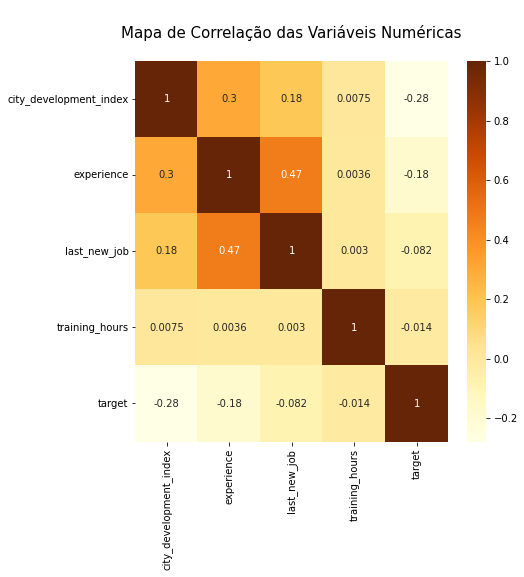

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.drop('enrollee_id', axis=1).corr("spearman"), annot=True, cmap="YlOrBr")
plt.title("\nMapa de Correlação das Variáveis Numéricas\n", fontsize=15)
plt.show()

**Variáveis categóricas e a variável alvo, usamos WOE e IV**

> woe = weight of evidence 

> iv = information value 

*Interpretamos o resultado de **IV** e **WOE** assim:*

**Se for maior que 0.02, não deve ser usado para previsão** <br>
**Se 0.02 - 0.1, preditor fraco**<br>
**Se 0.1 -0.3, preditor médio**<br>
**Se 0.3 - 0.5, preditor forte**<br>
**Se for maior que 0.5, não é aconselhável porque não é confiável**

In [ ]:
#Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')


target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 864x1008 with 0 Axes>

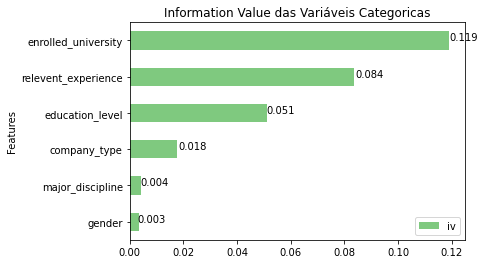

In [ ]:
#Plotagem information value 

columns_cat = df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns
#Lista para Iv 
iv = []

#Loop
for i in columns_cat:
  df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
  iv.append(df_woe_iv['iv'][0])

#DataFrame 
df_iv = pd.DataFrame({"Features": columns_cat, 'iv': iv}).set_index('Features').sort_values(by = 'iv')

#Figura
plt.figure(figsize=(12,14))
df_iv.plot(kind='barh', title="Information Value das Variáveis Categoricas", colormap="Accent") 
for index, value in enumerate(list(round(df_iv['iv'], 3))):
   plt.text((value), index, str(value))

plt.legend(loc="lower right")
plt.show();

* No gráfico acima, podemos notar que a ordem dos recursos com base em seu poder preditivo em relação ao alvo.

* Com base em seu valor **IV**, **enrollee_university** é um preditor médio, **relveante_experience** e **education_level** são preditivos fracos os outros são inúteis para a previsão.

**Indentificando Dados Desbalanceados**

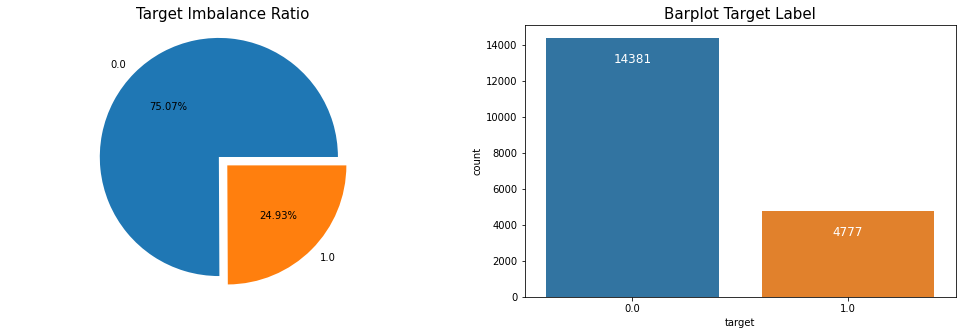

In [ ]:
#Figura
plt.figure(figsize=(17,(100)/20))
plt.subplot(121)


plt.pie(round(df['target'].value_counts() / len(df) * 100, 2),
        labels=list(df['target'].value_counts().index),
        autopct= "%.2f%%",
        explode = (0, 0.1))

plt.axis("equal")
plt.title('Target Imbalance Ratio', size=15)

plt.subplot(122)
ax = sns.countplot(data=df, x='target')
plt.title("Barplot Target Label", fontsize=15)

#Loop
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}',
              (p.get_x()+0.4,
               p.get_height()),
              ha='center',
              va='top',
              color='white',
              size=12)



**meta: 0 – Não estou à procura de mudança de emprego, 1 – À procura de mudança de emprego**

*Análise de quem quer realmente mudar de emprego, notamos que a maior porcentagem e de quem não quer mudar, só quer realmente fazer o processo seletivo, com este segmento podemos ter menos prejuízo para empresa, custando tempo dinheiro.*

### Indentificando Valores Ausentes

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


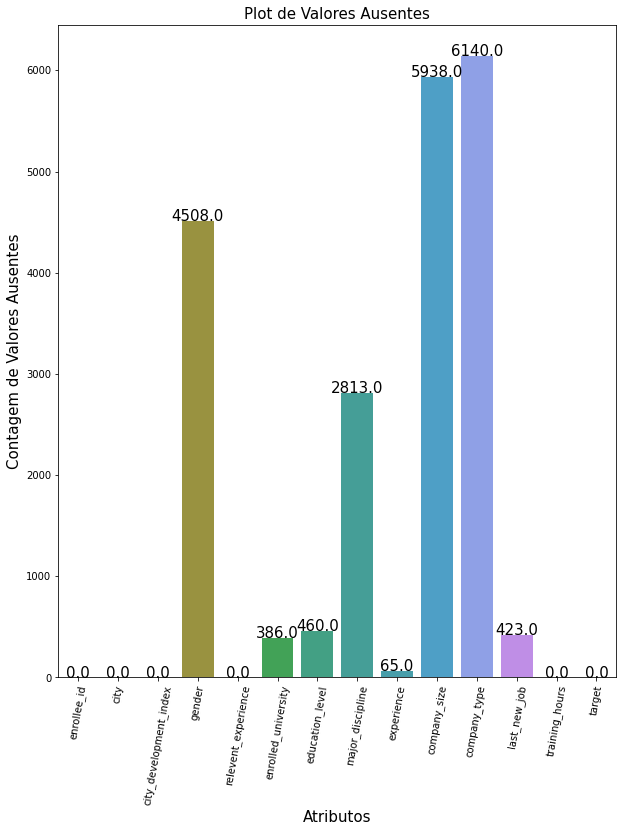

In [ ]:
#Valores ausentes das colunas
null_df = df.isna().sum().reset_index()

#Figura
ax = plt.figure(figsize=(10,12))

#Barplot 
ax = sns.barplot(null_df['index'], null_df[0], palette="husl")
plt.xlabel('Atributos', fontsize=15)
plt.ylabel('Contagem de Valores Ausentes', fontsize=15)
plt.xticks(rotation=80)
plt.title('Plot de Valores Ausentes', fontsize=15)
#Loop
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 15)
plt.show()

**Valores Ausentes em cada coluna têm um padrão aleatório**<br>
*Notável que sobre os dados que temos á uma confirmação de dados aleatórios que não seguem os componentes de cadastro.*

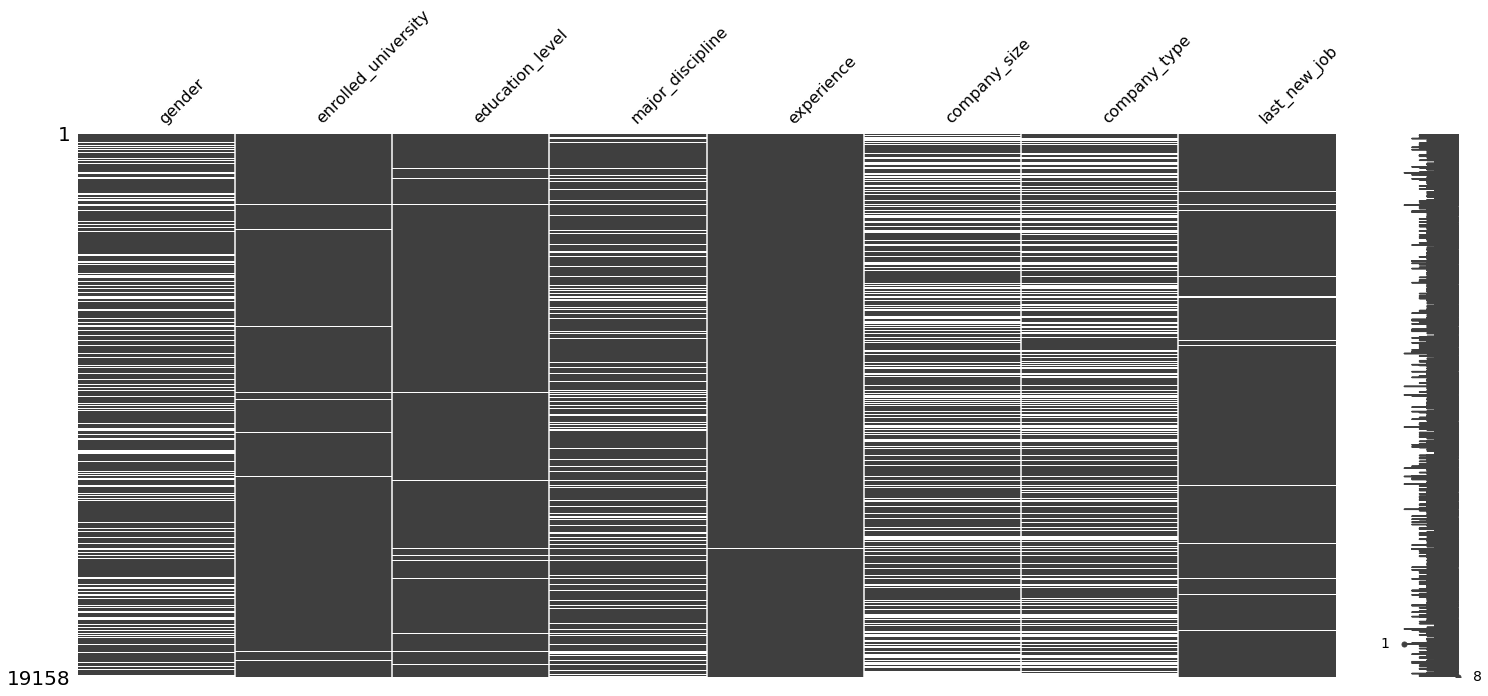

In [ ]:
#Gera a visualização 
df_nan = pd.DataFrame(df.isna().sum())

#Plot de valores ausentes
if df.isna().any(axis=None):
  missingno.matrix(df[df_nan[df_nan[0]>0].index])
  plt.show()

**Indentificando Valores Duplicados** <br>
*Neste caso o resultado foi 0, então não há valores duplicados*

In [ ]:
df['enrollee_id'].duplicated().sum()

0

# Tratamento de valores ausentes. ✅

In [ ]:
new_coluna = ['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']
new_df = df[new_coluna]

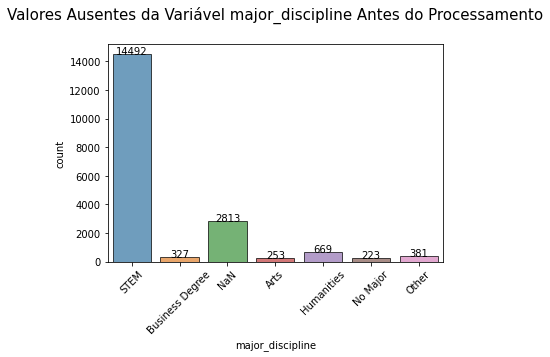

In [ ]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Antes do Processamento\n", fontsize = 15)
plt.show()

****

> Relação entre **major_discipline** x **education_level**

In [ ]:
print('\nTotal de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level: ')
new_df[new_df['major_discipline'].isna()]['education_level'].value_counts(dropna=False)


Total de Valores Ausentes na Variável major_discipline: 2813

Proporção de Valores Ausentes na Variável education_level: 


High School       2017
NaN                460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

*Dentre os registros com valores ausentes, vemos a proporção na variável education_level*

*Preencheremos os valores "NA", da variável **major_discipline** por **Non Degree** .*


In [ ]:
# Cria o índice
nan_index = (new_df[(new_df['major_discipline'].isna()) & ((new_df['education_level']=='High School') | 
(new_df['education_level'].isna()) 
| (new_df['education_level']=='Primary School'))]).index

In [ ]:
len(nan_index)

2785

In [ ]:
#imputando os valores ausentes 
new_df['major_discipline'][nan_index] = 'Non Degree'

In [ ]:
print('Total de Valores Ausentes na Variável major_discipline:', new_df['major_discipline'].isna().sum())
new_df['major_discipline'].value_counts(dropna=False)

Total de Valores Ausentes na Variável major_discipline: 28


STEM               14492
Non Degree          2785
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
NaN                   28
Name: major_discipline, dtype: int64

**Valores Ausentes da Variável major_discipline Após o Processamento**

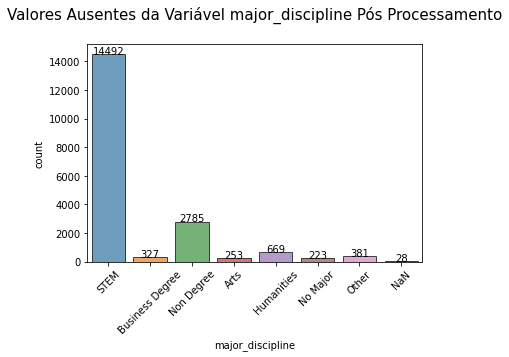

In [ ]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Pós Processamento\n", fontsize = 15)
plt.show()

**Para Valores ausentes restantes preechemos com other**

In [ ]:
new_df[new_df['major_discipline'].isna()] = 'Other'

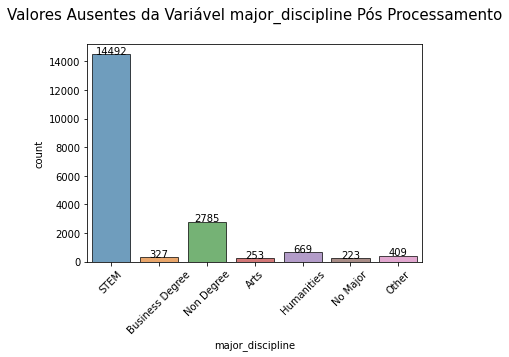

In [ ]:
sns.countplot(data = new_df.fillna('NaN'), x = 'major_discipline', alpha = 0.7, edgecolor = 'black')
plt.xticks(rotation = 45)
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável major_discipline Pós Processamento\n", fontsize = 15)
plt.show()

**Verificando valores ausentes da variável enrolled_university**

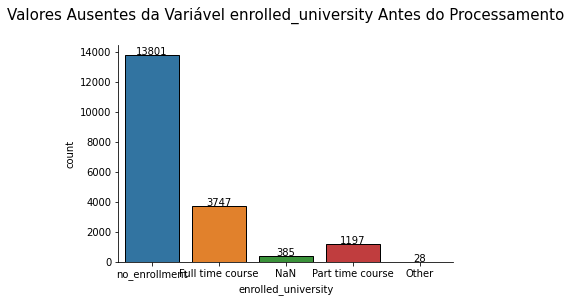

In [ ]:
#Plot 
sns.countplot(data=new_df.fillna("NaN"), x='enrolled_university', alpha=1, edgecolor='black')
sns.despine()
plt.xticks()
bound = ax.get_xbound()
ax = plt.gca()
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color='black', size=10)
plt.title('Valores Ausentes da Variável enrolled_university Antes do Processamento\n', size=15)
plt.show()

In [ ]:
print('\nTotal de Valores Ausentes na Variável enrolled_university:', new_df['enrolled_university'].isna().sum())
print('\nProporção de Valores Ausentes na Variável education_level:')
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)


Total de Valores Ausentes na Variável enrolled_university: 385

Proporção de Valores Ausentes na Variável education_level:


Graduate          170
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

**Processamento de dados**

*Candidatos com `Primary School` como `education_level` não estão qualificados para ingressar na universidade. Portanto, preencheremos valores `NaN` em `education_level` para `Primary Grad`.*

In [ ]:
#Prepara o índice
nan_index = (new_df[(new_df['enrolled_university'].isna()) & (new_df['education_level']=='Primary School')]).index

In [ ]:
len(nan_index)

9

In [ ]:
#Imputando valores ausentes
new_df['enrolled_university'][nan_index] = "Primary Grad"

In [ ]:
print('Total de Valores Ausentes:', new_df['enrolled_university'].isna().sum())
new_df[new_df['enrolled_university'].isna()]['education_level'].value_counts(dropna = False)

Total de Valores Ausentes: 376


Graduate       170
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [ ]:
# Prepara o índice
nan_index = new_df[(new_df['enrolled_university'].isna())].index

In [ ]:
# O restante colocamos como 'Other'
new_df['enrolled_university'][nan_index] = 'Other'

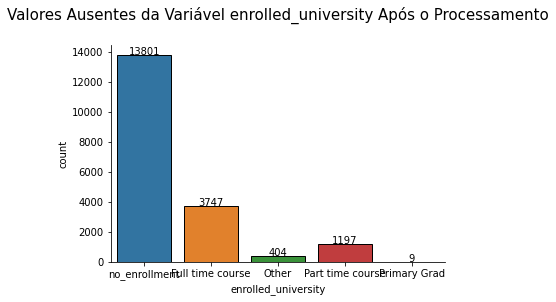

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'enrolled_university', alpha = 1, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável enrolled_university Após o Processamento\n", fontsize = 15)
plt.show()

**Verificando Valores Ausentes company_type**

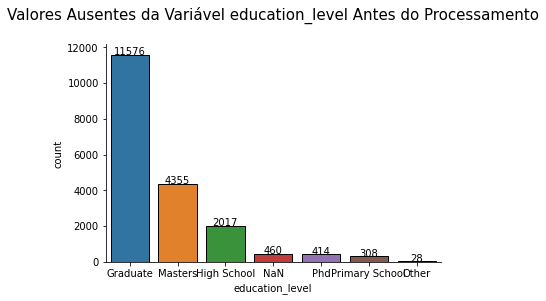

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 1, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Antes do Processamento\n", fontsize = 15)
plt.show()

In [ ]:
# Índice
nan_index = new_df[(new_df['education_level'].isna())].index
# Imputação dos valores NaN com 'Other'
new_df['education_level'][nan_index] = 'Other'

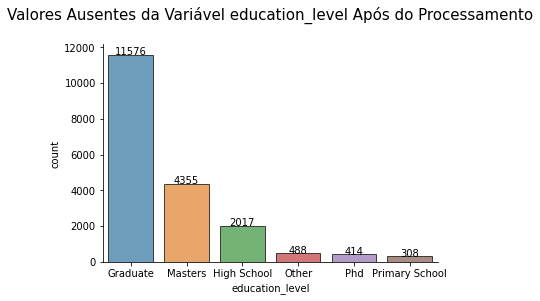

In [ ]:
# Plot
sns.countplot(data = new_df.fillna('NaN'), x = 'education_level', alpha = 0.7, edgecolor = 'black')
sns.despine()
plt.xticks()
bound=ax.get_xbound()
ax=plt.gca()
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
plt.title("Valores Ausentes da Variável education_level Após do Processamento\n", fontsize = 15)
plt.show()

**Verificando Valores Ausentes experience**

In [ ]:
new_df['experience'].value_counts(dropna = False)

In [ ]:
# Percentual de valores ausentes
percent_missing = new_df.isnull().sum() / len(new_df) * 100
percent_missing

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.441904
relevent_experience        0.000000
enrolled_university        0.000000
education_level            0.000000
major_discipline           0.000000
experience                 0.328844
company_size              30.932248
company_type              31.991857
last_new_job               2.181856
training_hours             0.000000
target                     0.000000
dtype: float64

In [ ]:
new_df['experience'].isnull().sum()


63

In [ ]:
new_df.shape

(19158, 14)

In [ ]:
new_df = new_df.dropna()

In [ ]:
new_df.shape

(9779, 14)

In [ ]:
percent_missing = new_df.isnull().sum() * 100 / len(new_df)
percent_missing

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


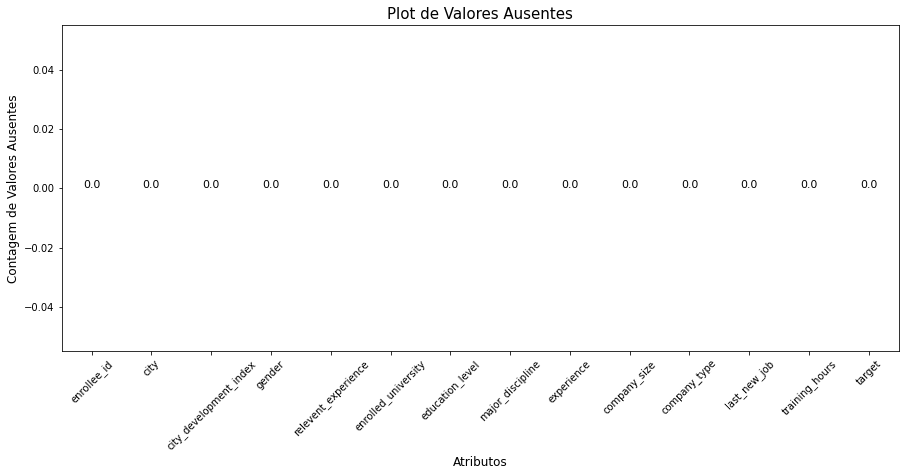

In [ ]:
# Valores ausentes por coluna
null_df = new_df.isna().sum().reset_index()

# Figura
ax = plt.figure(figsize = (15,6))

# Barplot
ax = sns.barplot(null_df['index'], null_df[0], palette = 'husl')
plt.xlabel('Atributos', fontsize = 12)
plt.ylabel('Contagem de Valores Ausentes', fontsize = 12)
plt.xticks(rotation = 45)
plt.title("Plot de Valores Ausentes", fontsize = 15)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, (p.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

**Ajustes Finais.**

In [ ]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0
6,28806,city_160,0.92,Male,Has relevent experience,no_enrollment,High School,Non Degree,5.0,50-99,Funded Startup,1.0,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,5.0,18,1.0
8,27107,city_103,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1.0,46,1.0


In [ ]:
# Ajustando os dados
new_df['enrolled_university'] = new_df['enrolled_university'].replace('no_enrollment', 'No enrollment')

In [ ]:
new_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,No enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,47,0.0
4,666,city_162,0.767,Male,Has relevent experience,No enrollment,Masters,STEM,21.0,50-99,Funded Startup,4.0,8,0.0
6,28806,city_160,0.92,Male,Has relevent experience,No enrollment,High School,Non Degree,5.0,50-99,Funded Startup,1.0,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,No enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,5.0,18,1.0
8,27107,city_103,0.92,Male,Has relevent experience,No enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1.0,46,1.0


In [ ]:
x = new_df.drop(columns = ['target'])
y = new_df['target']

Com base em nossa análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.


**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.